# Testing A Perceptual Phenomenon Project
**Author:** RRoot<br>
**Date:** 7/21/20<br>
**Course:** WGU C749 - Introduction to Data Science


<a id='toc'></a>
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#exploration">Data Exploration</a></li>    
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#analysis">Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>    
</ul>

<a id='intro'></a>
# Introduction
This project is one of two required for the Introduction to Data Science course at Western Governors University (WGU) in coordination with Udacity online learning. The goal of the project is to demonstrate a student's understanding of how data is analysed.

*"Project Overview

In this project, you will investigate a classic phenomenon from experimental psychology called the Stroop Effect. You will learn a little bit about the experiment, create a hypothesis regarding the outcome of the task, then go through the task yourself. You will then look at some data collected from others who have performed the same task and will compute some statistics describing the results. Finally, you will interpret your results in terms of your hypotheses."*(<a href="#references">1</a>)

## Background Information
*"Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has **two conditions: a congruent words condition, and an incongruent words condition.** In the **congruent** words condition, the words being displayed are **color** words whose names **match** the colors in which they are printed: for example **<span style="color:red">RED</span>, <span style="color:blue">BLUE</span>**. In the **incongruent** words condition, the words displayed are color words whose names **do not match** the colors in which they are printed: for example **<span style="color:red">PURPLE</span>**, <span style="color:blue">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.*"(<a href="#references">1</a>)


## Questions
The focus of this project is answering the following questions:

1. What is our independent variable? What is our dependent variable?
<a href='#ans1'>Answer 1</a>


2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
<a href='#ans2'>Answer 2</a>


3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.
<a href='#ans3'>Answer 3</a>


4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.
<a href='#ans4'>Answer 4</a>


5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?
<a href='#ans5'>Answer 5</a>


6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!
<a href='#ans6'>Answer 6</a>



## Taking the Test
To gain firsthand knowledge the meaning of this data students were provided with a link to a web application hosted by the University of Washington(<a href="#references">3</a>). This application allows one to take the test for themselves. The test involved reading the words out-loud and recording the time it took to complete the task.

![Image of the test web page](images/TheStoopEffectTestAtTheUW.png)


When I took the test it came out to the following results:
- **Congruent** words and colors took me **14.506** seconds to read 
- **Incongruent** words and colors took me **38.019** seconds to read

Due to this effect, I took an average of 2.6 times longer to read the words based on the text's color when the text and color were incongruent than when they were congruent.

In [1]:
''' This code cell contains my setup code '''

# Define Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint as pp
import seaborn as sns

# Reconfigure dataframe display
pd.set_option('max_colwidth', 100) 
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format  # Suppress scientific notation and remove cents

# Create a class to manage text formatting
class ffont:
    ''' 
    This class enumerates a list of ANSI Escape codes for font formating
    (ref: http://ascii-table.com/ansi-escape-sequences.php 
     and https://godoc.org/github.com/whitedevops/colors)
    '''
    normal = '\033[0m' 
    bold = '\033[1m'
    underline = '\033[4m'
    blue = '\033[94m'
    red = '\033[91m'
    black = '\033[30m'

# print a message using my "Note" format 
# defined with my "formatted font" class ffont
def print_msg(message_type = '', text = ''):
    # Set message type format and print the type
    if message_type.lower() == 'info':
        print(ffont.bold,ffont.blue)
    elif message_type.lower() == 'note':
        print(ffont.bold,ffont.black)
    elif message_type.lower() == 'warning':
        print(ffont.bold,ffont.red)
    else:
        print(ffont.normal,end='')
    print(message_type + ': ',end='')
    # Set text format and print the text
    print(ffont.normal,end='')
    print(text)
    

# Get a Histogram conformed to this notebooks design format 
def get_simple_hist(data_frame, key_for_stats, figsize=(6,3), bins=10):        
    axis = data_frame.hist(column=key_for_stats,figsize=figsize,bins=bins,)

# Get a basic set of Stats
def get_simple_stats(data_frame, key_for_stats, show_basic_hist=False, bins=10 ):
    ''' This functions shows statistics for a attribute in a given dataframe '''
    # Configure presentation
    print(ffont.bold,ffont.red)
    
    # print stats for all types
    data = data_frame[key_for_stats]
    print('Statistics for {k}:'.format(k = key_for_stats.title()))
    print(ffont.normal,end='')                  
    print('Count: {c:<} of {t}'.format(c = np.count_nonzero(data), t = len(data)))
    print('Null or Zero: {c:<}'.format(c = len(data) - np.count_nonzero(data)))
    
    # Print stats for numeric data types
    try:        
        print('Minimum: {mi:<10.2f}'.format(mi = np.min(data)))
        print('Maximum: {mx:<10.2f}'.format(mx = np.max(data)))       
        print('Mean: {m:<10.2f}'.format(m = np.mean(data)))        
        print('Std Dev: {sd:<10.2f}'.format(sd = np.std(data))) 
    except:
        print()
    
    # Optionally show a histogram
    if show_basic_hist:
        get_simple_hist(data_frame=data_frame, key_for_stats=key_for_stats, figsize=(6,3), bins=10)    


<a href="#toc">(Back to Table of Contents)</a>
<a id='exploration'></a>
# Data Exploration



In [2]:
print_msg(message_type = 'Info', text = 'Data types for sample data')
# Load the data and print out a few lines.
test_data_dframe = pd.read_csv('data/stroopdata.csv')
test_data_dframe.dtypes

 
Info: Data types for sample data


Congruent      float64
Incongruent    float64
dtype: object

In [3]:
test_data_dframe.describe()

,Congruent,Incongruent
count,24.00,24.00
mean,14.05,22.02
std,3.56,4.80
min,8.63,15.69
25%,11.90,18.72
50%,14.36,21.02
75%,16.20,24.05
max,22.33,35.26


 
Info: Histograms for sample data


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F635727A08>]],
      dtype=object)

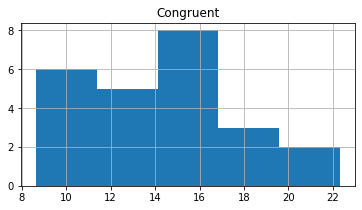

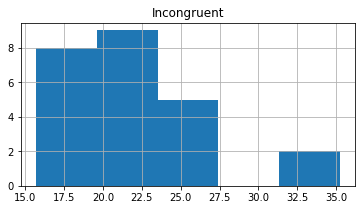

In [4]:
print_msg(message_type = 'Info', text = 'Histograms for sample data')

test_data_dframe.hist(column='Congruent',figsize=(6,3),bins=5)
test_data_dframe.hist(column='Incongruent',figsize=(6,3),bins=5)

<a href="#toc">(Back to Table of Contents)</a>
<a id='wrangling'></a>
# Data Wrangling

There were not many transformations needed with this data, but I did decide to add a few columns to make it easier to spot the differences from the mean for each set of test data.

In [5]:
print_msg(message_type = 'Note', text = '\n \
* Negative Differences per sample value indicates slower incongruent reading times \n \
  when compared to congruent reading times \
\n \
* Negative Mean Deviations per sampled value indicate faster reading from mean')

# Add a difference column
test_data_dframe['Difference'] = test_data_dframe['Congruent'] - test_data_dframe['Incongruent']
data_means_series= test_data_dframe.mean()

test_data_dframe['Congruent_Mean'] = data_means_series['Congruent']
test_data_dframe['Incongruent_Mean'] = data_means_series['Incongruent']
test_data_dframe['Congruent_Mean_Deviation'] = (data_means_series['Congruent'] - (test_data_dframe['Congruent'])) * -1
test_data_dframe['Incongruent_Mean_Deviation'] = (data_means_series['Incongruent'] - (test_data_dframe['Incongruent'])) * -1
test_data_dframe

 
Note: 
 * Negative Differences per sample value indicates slower incongruent reading times 
   when compared to congruent reading times 
 * Negative Mean Deviations per sampled value indicate faster reading from mean


,Congruent,Incongruent,Difference,Congruent_Mean,Incongruent_Mean,Congruent_Mean_Deviation,Incongruent_Mean_Deviation
0,12.08,19.28,-7.20,14.05,22.02,-1.97,-2.74
1,16.79,18.74,-1.95,14.05,22.02,2.74,-3.27
2,9.56,21.21,-11.65,14.05,22.02,-4.49,-0.80
3,8.63,15.69,-7.06,14.05,22.02,-5.42,-6.33
4,14.67,22.80,-8.13,14.05,22.02,0.62,0.79
5,12.24,20.88,-8.64,14.05,22.02,-1.81,-1.14
6,14.69,24.57,-9.88,14.05,22.02,0.64,2.56
7,8.99,17.39,-8.41,14.05,22.02,-5.06,-4.62
8,9.40,20.76,-11.36,14.05,22.02,-4.65,-1.25
9,14.48,26.28,-11.80,14.05,22.02,0.43,4.27


In [6]:
print_msg(message_type = 'Note', text = 'Negative Mean Deviations per sampled value indicate faster reading from mean')

print_msg(message_type = 'Note', text = 'In this small sample, \
there is little correlation between being close to the congruent mean and being close to the incongruent mean.')

test_data_dframe['Difference_Between_Mean_Deviations'] = (test_data_dframe['Congruent_Mean_Deviation'] - test_data_dframe['Incongruent_Mean_Deviation'])

keep_these = ['Congruent_Mean_Deviation', 'Incongruent_Mean_Deviation', 'Difference_Between_Mean_Deviations']
diff_dframe = test_data_dframe[keep_these]

diff_dframe = diff_dframe.sort_values(by=['Incongruent_Mean_Deviation'], ascending=False)
diff_dframe = diff_dframe.reset_index(drop=True)
diff_dframe.head(10)

 
Note: Negative Mean Deviations per sampled value indicate faster reading from mean
 
Note: In this small sample, there is little correlation between being close to the congruent mean and being close to the incongruent mean.


,Congruent_Mean_Deviation,Incongruent_Mean_Deviation,Difference_Between_Mean_Deviations
0,4.15,13.24,-9.09
1,-1.68,12.27,-13.95
2,0.43,4.27,-3.84
3,4.44,3.12,1.32
4,0.64,2.56,-1.92
5,8.28,2.51,5.77
6,-1.11,1.88,-2.99
7,0.62,0.79,-0.17
8,-1.92,0.14,-2.06
9,5.66,0.04,5.62


<a href="#toc">(Back to Table of Contents)</a>
<a id='analysis'></a>
# Data Analysis
With the data ready it is time to analyse it for information and answer some questions.

<a id='ans1'></a>
1. What is our independent variable? What is our dependent variable?

In each test the time it takes to read a set of words out loud varies depending on the test cases of Congrutent and Incongruent. Thus, the **condition of the Congruent and Incongruent words sets are our independent variables** and the **time it takes to read** these words is our **dependent variable**. 

<a id='ans2'></a>
2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

I wanted to test the statement, "The time to read incongruent word-color pairs is greater than congruent word-color pairs?" I believe from my personal experience that it did, but I would try to prove that using statistics on my test case data.

**Variables**

* CM = Congruent Mean

* IM = Incongruent Mean

* H0 = Null Hypothesis

* Ha = Alternate Hypothesis


<font size='2'>$H0=CM<IM$</font>

and 

<font size='2'>$Ha=CM>=IM$</font>


**One-Tailed Test**

Since the standard deviation of the whole population is not known, I needed to create an estimate using a t-test. In this case I made the assumption that if I had all the data points I will have a normal distribution, similar to the test data. Since I am trying to prove that the Congruent Mean is less than the Incongruent Mean in almost all cases, I could use a left one-tailed t-test to estimate a reasonably high confidence interval and be reasonably confident in my conclusion.

<img src='.\Images\Rejection Point.png' alt='Image of the once tail rejection point on normal distribution' align='left'></img>

<a id='ans3'></a>
3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [7]:
nbar = test_data_dframe['Congruent'].count()
print_msg(message_type = 'Warning', text = 'The sample size of ' + str(nbar) + ' is very small!')

get_simple_stats(test_data_dframe,'Congruent')
get_simple_stats(test_data_dframe,'Congruent_Mean_Deviation')

get_simple_stats(test_data_dframe,'Incongruent')
get_simple_stats(test_data_dframe,'Incongruent_Mean_Deviation')

get_simple_stats(test_data_dframe,'Difference')

 
 
Statistics for Congruent:
Count: 24 of 24
Null or Zero: 0
Minimum: 8.63      
Maximum: 22.33     
Mean: 14.05     
Std Dev: 3.48      
 
Statistics for Congruent_Mean_Deviation:
Count: 24 of 24
Null or Zero: 0
Minimum: -5.42     
Maximum: 8.28      
Mean: -0.00     
Std Dev: 3.48      
 
Statistics for Incongruent:
Count: 24 of 24
Null or Zero: 0
Minimum: 15.69     
Maximum: 35.26     
Mean: 22.02     
Std Dev: 4.70      
 
Statistics for Incongruent_Mean_Deviation:
Count: 24 of 24
Null or Zero: 0
Minimum: -6.33     
Maximum: 13.24     
Mean: -0.00     
Std Dev: 4.70      
 
Statistics for Difference:
Count: 24 of 24
Null or Zero: 0
Minimum: -21.92    
Maximum: -1.95     
Mean: -7.96     
Std Dev: 4.76      


<a id='ans4'></a>
4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.


 
Info: Blue is Congruent and Orange is Incongruent times


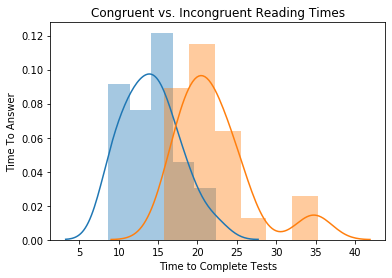

In [8]:
print_msg(message_type = 'Info', text = 'Blue is Congruent and Orange is Incongruent times')
sns.distplot(test_data_dframe['Congruent'],label='Congruent');
sns.distplot(test_data_dframe['Incongruent'],label='Incongruent');
plt.xlabel("Time to Complete Tests");
plt.ylabel("Time To Answer");
plt.title("Congruent vs. Incongruent Reading Times");

In the above graph, we see that the time to take the congruent test in substantially less than the time it takes to perform the incongruent test. 

 
Note: Negative Differences per sample value indicates slower incongruent reading times 
   when compared to congruent reading times

One Standard Deviation to the left is approximately -12 on this chart


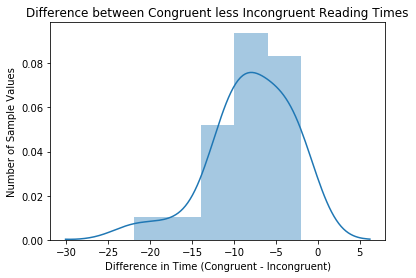

In [9]:
print_msg(message_type = 'Note', text = 'Negative Differences per sample value indicates slower incongruent reading times \n \
  when compared to congruent reading times\n')

sns.distplot(test_data_dframe['Difference'],label='Difference');
plt.xlabel('Difference in Time (Congruent - Incongruent)');
plt.ylabel('Number of Sample Values');
plt.title('Difference between Congruent less Incongruent Reading Times');

diff_std = test_data_dframe['Difference'].std()
diff_mean = test_data_dframe['Difference'].mean()

print('One Standard Deviation to the left is approximately %i on this chart' % (diff_mean - diff_std))

In the above graph, we see that the difference between congruent and incongruent reading times is always negative in this sample data, meaning that the **incongruent reading times are always slower**. Note that they are seldom outside the range one standard deviation meaning that most people respond with a similar difference in time.

<a id='ans5'></a>
5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

Since we do not have a fixed mean or know the standard deviation for the whole population, I needed to estimate one by defining a Confidence Interval. 

In [10]:
test_data_dframe['Difference'].describe()

count    24.00
mean     -7.96
std       4.86
min     -21.92
25%     -10.26
50%      -7.67
75%      -3.65
max      -1.95
Name: Difference, dtype: float64

Statistical Values for Difference Metric
Mean = -7.96 = <font size="4"> $\mu$</font>d

Std Dev of the sample differences = 4.86 = <font size="4"> $\sigma$</font>d = standard error

Sample Size = 24 = <font size="4">n</font>

Degrees of Freedom = n - 1 = 23

Standard Error (sd) = <font size="4">$\frac{\sigma}{({\sqrt{n}})}$</font> 

= 4.86 / sqrt(24)

= 4.86 / 4.90

= .99


Confidence Interval = <font size="4">CI = ${\bar x} - 2(\frac{\sigma}{({\sqrt{n}})})$ to ${\bar x} + 2(\frac{\sigma}{({\sqrt{n}})})$ </font>
 
ci_min = -7.96 - (2 * 4.86/24)

ci_max = -7.96 + (2 * 4.86/24)

In [11]:
ci_min = -7.96 - (2 * 4.86/24)
ci_max = -7.96 + (2 * 4.86/24)
print('CI Interval is between',ci_min, ' and', ci_max)                  

CI Interval is between -8.365  and -7.555


<a href="#toc">(Back to Table of Contents)</a>
<a id='conclusions'></a>
# Conclusions

I failed to reject the null hypothesis and accept the null as true, that the reading times for congruent word color pairs are less than incongruent word pairs. This did match my expectations.

Interestingly, even if a person were quick to read the matched word-color pairs, that was not a predictor of being quick to read the unmatched pairs. I expected there to be a correlation between being close to the congruent mean and being close to the incongruent mean. Without more to go on, this could mean that there is no correlation or just an artifact of the sample.

<a href="#toc">(Back to Table of Contents)</a>
<a id='references'></a>
# References

1. Project Overview on Udacity web application (login required), 2020,
https://classroom.udacity.com/nanodegrees/nd002-wgu/parts/597f7db0-2a0c-46ee-ab03-1ab26cfbdd4a/modules/22f550f5-c907-4aba-9ba8-fa50342e2a98/lessons/1f978bfb-ba23-49a5-9e66-93843b13c8b9/concepts/46269203530923

2. Statistics: The Science of Decisions Project Instructions, 2020,
https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True

3.Neuroscience For Kids, The Stoop Effect
https://faculty.washington.edu/chudler/words.html#seffect

4. Pandas Documentation, 2020, https://pandas.pydata.org/docs/user_guide/index.html

5. Seaborn Documentation, 2020, https://seaborn.pydata.org

6. 7 Essential Tips for Writing With Jupyter Notebook, 2020, https://towardsdatascience.com/7-essential-tips-for-writing-with-jupyter-notebook-60972a1a8901
